In [1]:
import requests
from PIL import Image   ##PIL is library   and image is class containing functions for img
from io import BytesIO

In [2]:
def download_img(url):      ##Code for image downloading mostly same
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [3]:
im1 = download_img('https://5.imimg.com/data5/SELLER/Default/2020/9/VU/HV/JL/98111269/whatsapp-image-2020-09-08-at-3-20-50-pm-2--500x500.jpeg')
im1.save('image.png')     ##To save img in folder 

In [4]:
im2 = Image.open(r"C:\Users\HP\Pictures\vdoeditor.JPG")    ##to get img from PC copy img path and paste here with r in beginning r= raw string
im2.save('image2.png')
im2.size

(1068, 567)

In [5]:
im1.show()    #To show img


In [6]:
im1.info      #to show img info


{'jfif': 257,
 'jfif_version': (1, 1),
 'jfif_unit': 0,
 'jfif_density': (1, 1),
 'exif': b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x008c\x00\x00\xe8\x03\x00\x008c\x00\x00\xe8\x03\x00\x00\x06\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00\xf4\x01\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00\xf4\x01\x00\x00\x00\x00\x00\x00',
 'dpi': (25.4, 25.4)}

In [7]:
im1.mode      #RGB

'RGB'

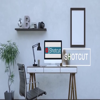

In [8]:
#Resize img
im2.resize((100,100))

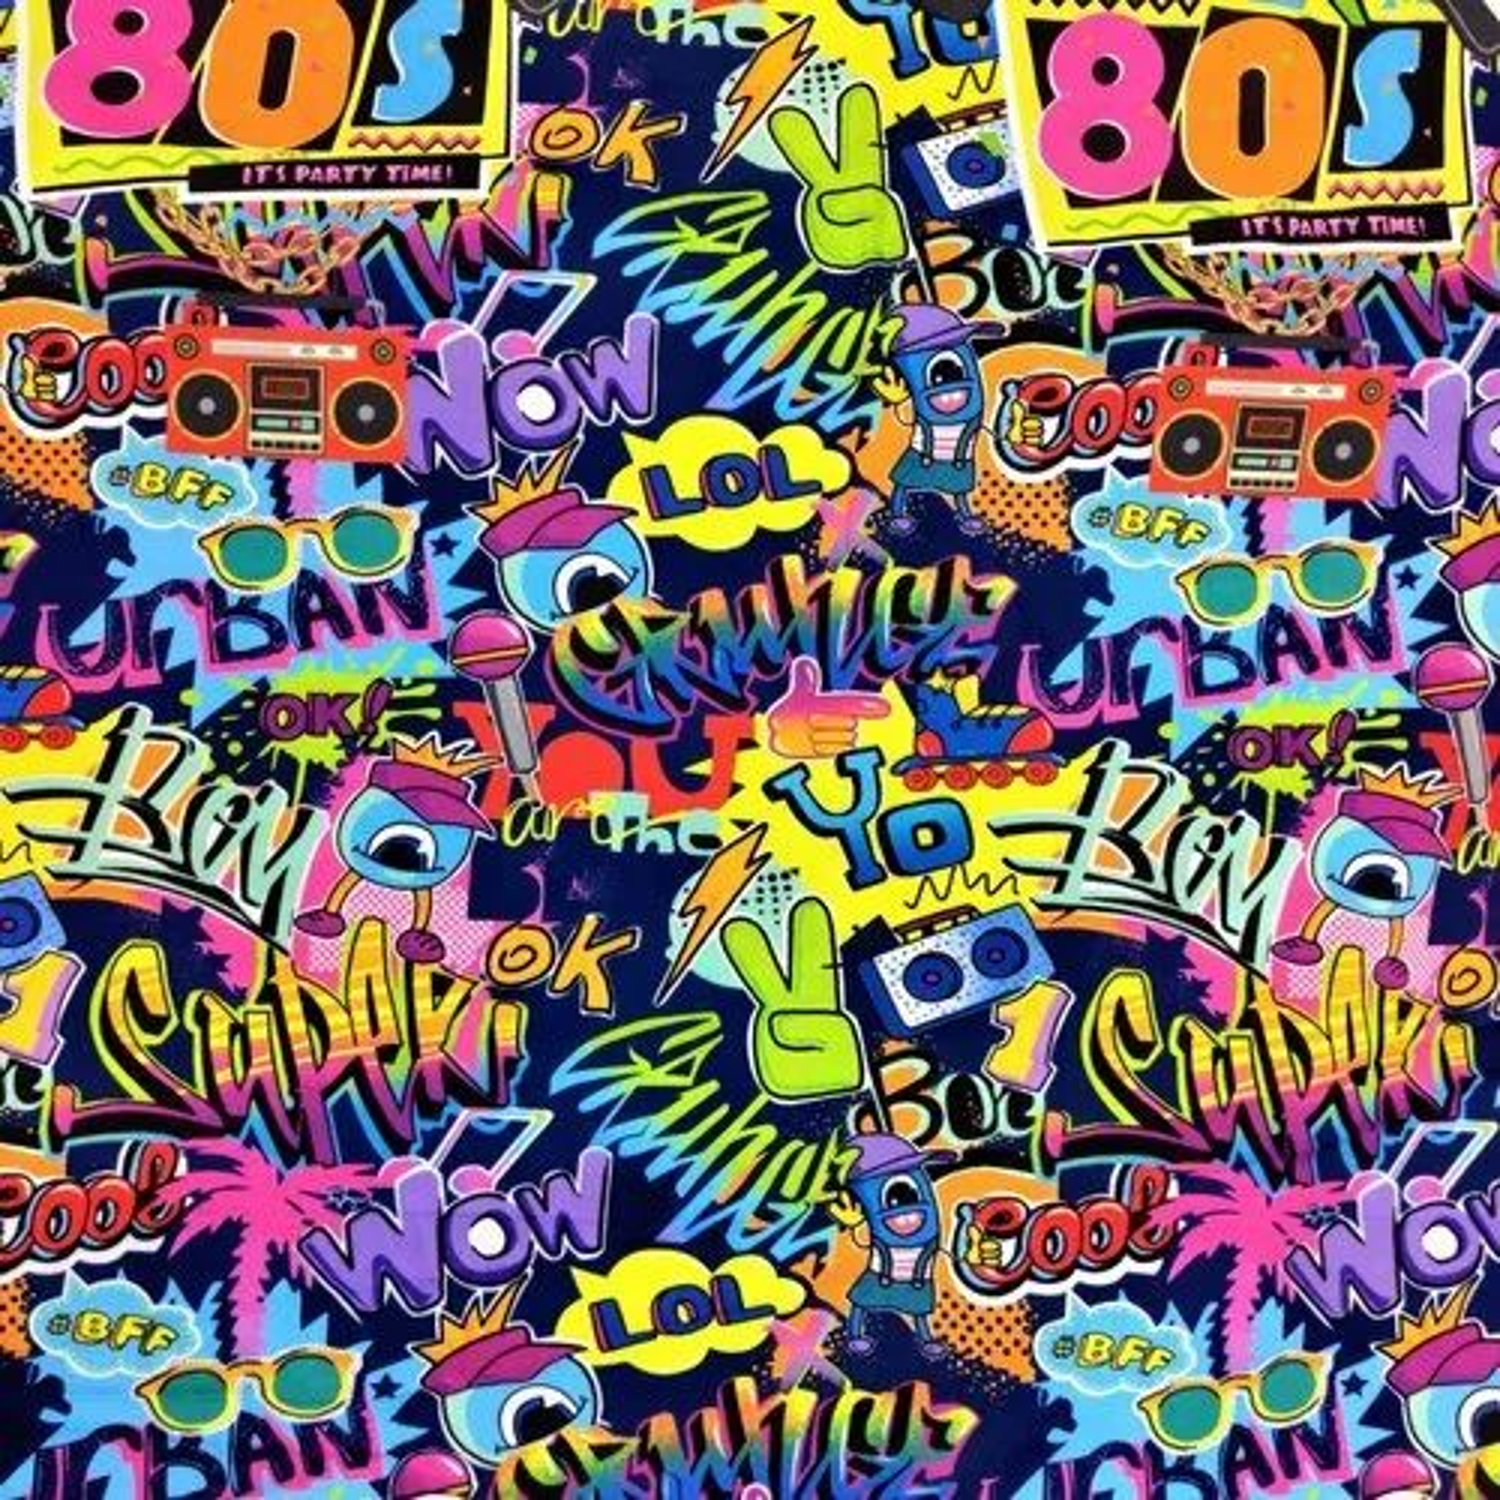

In [9]:
#Resize img Example 2  (enlarging)
im1.resize((3* im1.width, 3* im1.height))    #Diffrent values allowed but not float value cause pixels cant be in decimals 

In [10]:
#Saving img after resizing 
im2.resize((im2.width//3, im2.height//3)).save('image3.png')     #resize img by 1/3 of size and then save as new img 

In [11]:
from PIL import ImageDraw, ImageFont

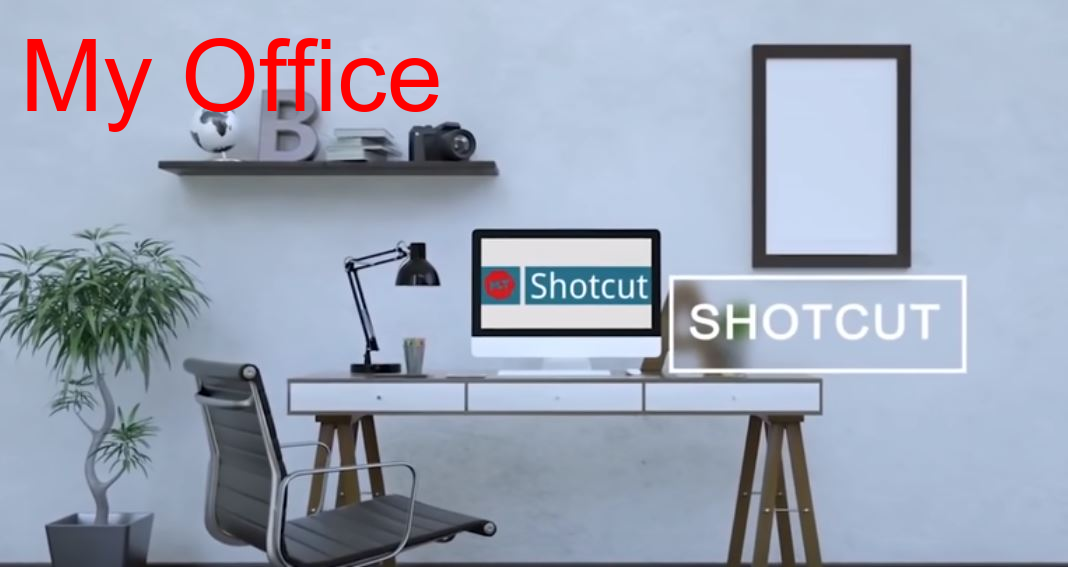

In [12]:
drawIm2 = ImageDraw.Draw(im2)
drawIm2.text((20,20), 'My Office', fill='Red', font=ImageFont.truetype('arial.ttf',100))
im2

In [13]:
im2.show()

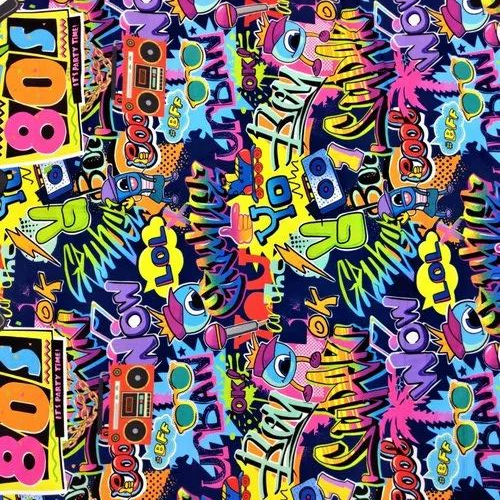

In [14]:
#Rotate img 
im1.rotate(90)

In [18]:
im2.rotate(30, expand = True, fillcolor = 'white').save('image4.png')     #expand function is used to get full image size when rotated important.
                                                        #Fillcolor fills spaces if orientation is not 90 (b/w img boundary and canvas)

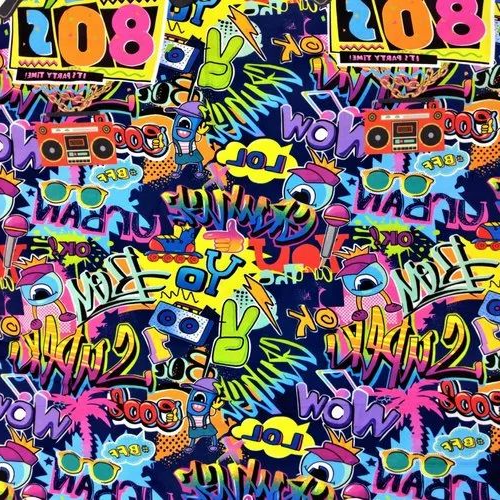

In [19]:
#Flip Image 
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

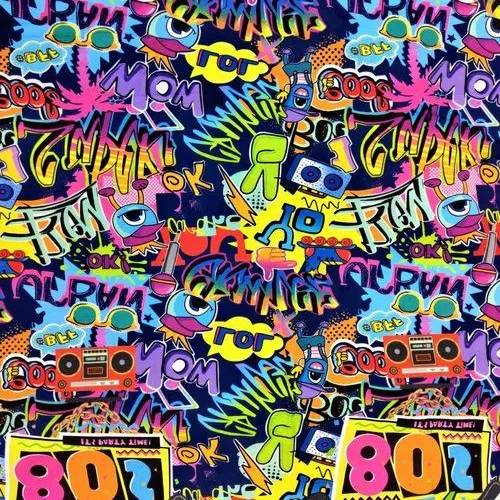

In [20]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [21]:
sky = download_img('https://thumbs.dreamstime.com/b/blue-sky-clouds-natural-background-92316401.jpg')
sky.save("Sky.png")

In [22]:
sheep = download_img('https://www.investopedia.com/thmb/nIII1VEEeKkOSOuLSSNv8nPMw0I=/2269x1322/filters:fill(auto,1)/GettyImages-155379351-fff005c918bd467daf32c935889a4487.jpg')
sheep.save('Sheep.png')

In [23]:
#Before blending both the images need to be of same size, Resolution and format
print("Sky Reso:", sky.size)
print("Sky format:", sky.format)
print("Sheep Reso:", sheep.size)
print("Sheep Format:", sheep.format)

Sky Reso: (800, 533)
Sky format: JPEG
Sheep Reso: (2269, 1322)
Sheep Format: JPEG


In [29]:
#blending 2 images in 1
def blend_image(image_1, image_2, mode="RGB", size=(100,100), alpha=0.1): 
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_2 = image_2.convert(mode)
    blended_image = Image.blend(image_1, image_2, alpha)
    return blended_image

In [35]:
blend_image(sky, sheep, alpha=0.5, size=(1000,1000)).show()

In [55]:
icon = download_img('https://www.pngfind.com/pngs/m/2-22694_ironman-free-png-image-mark-85-de-iron.png')
icon.save('ICON.png')

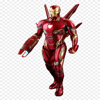

In [62]:
Image.open('ICON.png').resize((100,100))

In [40]:
im1 = im1.convert('RGBA')      #RGBA is for alpha
im1.paste(icon, (0,0))    #PAsting icon on img 
im1.show()

In [47]:
im1.paste(icon, (200,200))
im1.show()         #Pasting at another location 


In [50]:
def add_watermark(image, watermark, style = None, pos=(0,0)):
    image = image.convert('RGBA')                       #convert img to RGB
    watermark = watermark.convert('RGBA')                #convert watermark to RGB
    if style == 'tile':
        for x in range(0, image.width, watermark.width):       #to paste watermark in form of tile in entire length
            for y in range(0, image.height, watermark.height):
                image.paste(watermark, (x,y), mask = watermark)
    elif style is None:
        image.paste(watermark, pos, mask = watermark)
    return image

In [68]:
add_watermark(im2, icon, pos = (im2.width-175, im2.height-175)).show()     #Pasting at diff location 

In [69]:
from PIL import ImageFilter      #To get image filters 

In [73]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(7),
    ImageFilter.MinFilter(7),
    ImageFilter.MedianFilter(3),
    ImageFilter.GaussianBlur(5),
    ImageFilter.ModeFilter(30),
    ImageFilter.RankFilter(3,3),
]

for i, filter in enumerate(filters):
    sheep.filter(filter).save(f'sheep_{i}.png')     #To save all images with names by enumerate function